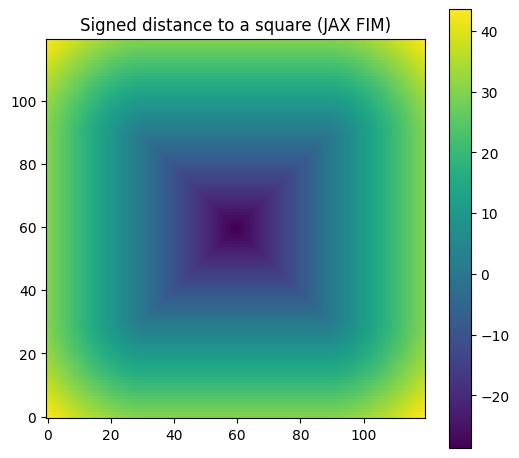

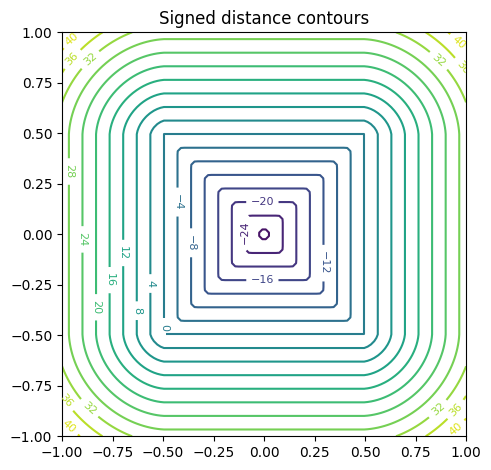

In [ ]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

from SDF_computation import fim_eikonal_2d, init_square_boundary, to_signed

H, W = 120, 120
ax, bx = 30, 89
ay, by = 30, 89

dist0, frozen = init_square_boundary(H, W, ax, bx, ay, by)

dist = fim_eikonal_2d(dist0, frozen, n_iters=120)

inside = jnp.zeros((H, W), dtype=bool).at[ay:by+1, ax:bx+1].set(True)
signed = to_signed(dist, inside)

# 4) Visualize
plt.figure(figsize=(5.4, 4.8))
plt.imshow(signed, origin="lower", cmap="viridis")
plt.colorbar()
plt.title("Signed distance to a square")
plt.tight_layout()

ys = jnp.linspace(-1.0, 1.0, H)
xs = jnp.linspace(-1.0, 1.0, W)
X, Y = jnp.meshgrid(xs, ys)

plt.figure(figsize=(5.4, 4.8))
CS = plt.contour(X, Y, signed, levels=20)
plt.clabel(CS, inline=True, fontsize=8)
plt.title("Signed distance contours")
plt.gca().set_aspect("equal", adjustable="box")
plt.tight_layout()
plt.show()

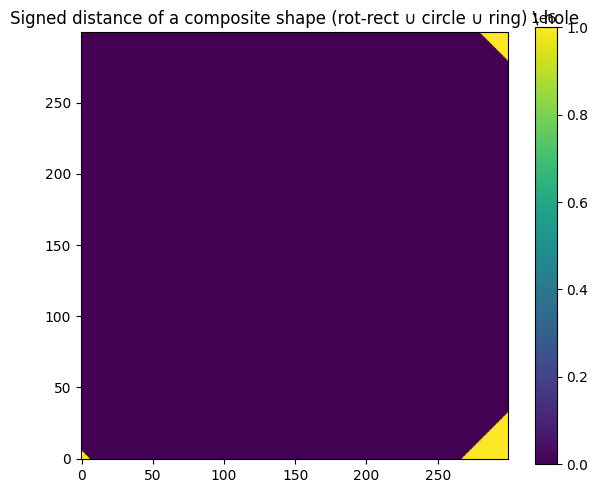

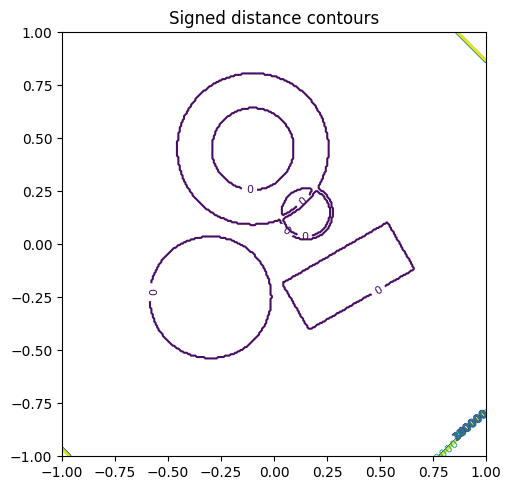

In [ ]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

from SDF_computation import fim_eikonal_2d, build_composite_boundary_and_inside, to_signed

H, W = 243, 243  
dist0, frozen, inside = build_composite_boundary_and_inside(H, W)

dist = fim_eikonal_2d(dist0, frozen, n_iters=150)

signed = to_signed(dist, inside)

plt.figure(figsize=(6, 5))
plt.imshow(signed, origin="lower", cmap="viridis")
plt.colorbar()
plt.title("Signed distance of a composite shape (rot-rect ∪ circle ∪ ring) \\ hole")
plt.tight_layout()

ys = jnp.linspace(-1.0, 1.0, H)
xs = jnp.linspace(-1.0, 1.0, W)
X, Y = jnp.meshgrid(xs, ys)

plt.figure(figsize=(6, 5))
CS = plt.contour(X, Y, signed, levels=25)
plt.clabel(CS, inline=True, fontsize=8)
plt.gca().set_aspect("equal", adjustable="box")
plt.title("Signed distance contours")
plt.tight_layout()
plt.show()